# Week 6 Notebook 2 SDG Case Study

In this lesson, we will use the API provided by the [United Nations Statistics Division (UNSD)](https://unstats.un.org/home/).

You will use UNSD API to:
- send GET requests with a list of required countries as parameter values
- send POST requests to obtain a CSV file.

First, we must import the `requests` library.

In [1]:
import requests

## The UNSD SDGs API

The UNStats.org Sustainable Development Goals API is available here: https://unstats.un.org/SDGAPI/swagger/.
You can see that some API endpoints are listed as POST and some as GET.
We already learn on how to use the GET requests, so let's try that first. 

### Getting the List of Goals

The first API endpoint we want to try is to get the list of goals.

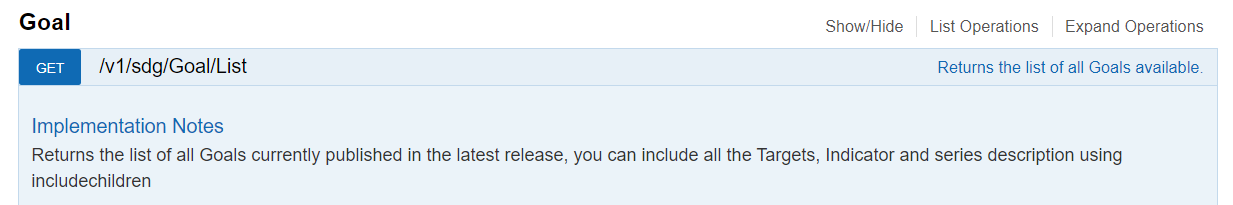

The Base URL is `http://unstats.un.org/SDGAPI`and the endpoint is `/v1/sdg/Goal/List`.

In [2]:
# Return a list of all Goals in the latest release
goals = requests.get("https://unstats.un.org/SDGAPI/v1/sdg/Goal/List")
print(goals.status_code )

200


**Decoding JSON**

Since the status code is `200`, let's decode the content.

In [3]:
goalsData = goals.json()
print(goalsData)

[{'code': '1', 'title': 'End poverty in all its forms everywhere', 'description': 'Goal 1 calls for an end to poverty in all its manifestations, including extreme poverty, over the next 15 years. All people everywhere, including the poorest and most vulnerable, should enjoy a basic standard of living and social protection benefits.', 'uri': '/v1/sdg/Goal/1'}, {'code': '2', 'title': 'End hunger, achieve food security and improved nutrition and promote sustainable agriculture', 'description': 'Goal 2 seeks to end hunger and all forms of malnutrition and to achieve sustainable food production by 2030. It is premised on the idea that everyone should have access to sufficient nutritious food, which will require widespread promotion of sustainable agriculture, a doubling of agricultural productivity, increased investments and properly functioning food markets.', 'uri': '/v1/sdg/Goal/2'}, {'code': '3', 'title': 'Ensure healthy lives and promote well-being for all at all ages', 'description': 

**Neatly Print the Goals List**

We can see the data is returned as a list of dictionaries, so let's print a list of each goal using the `title` key.

In [4]:
# Print each goal's code and title
for goal in goalsData:
    print(goal['code'], goal['title'])

1 End poverty in all its forms everywhere
2 End hunger, achieve food security and improved nutrition and promote sustainable agriculture
3 Ensure healthy lives and promote well-being for all at all ages
4 Ensure inclusive and equitable quality education and promote lifelong learning opportunities for all
5 Achieve gender equality and empower all women and girls
6 Ensure availability and sustainable management of water and sanitation for all
7 Ensure access to affordable, reliable, sustainable and modern energy for all
8 Promote sustained, inclusive and sustainable economic growth, full and productive employment and decent work for all
9 Build resilient infrastructure, promote inclusive and sustainable industrialization and foster innovation
10 Reduce inequality within and among countries
11 Make cities and human settlements inclusive, safe, resilient and sustainable
12 Ensure sustainable consumption and production patterns
13 Take urgent action to combat climate change and its impacts


### Get Indicators and Data Series

For each goal, there is a list of targets. There are specific indicators defined for the targets that should be tracked by the various UN member countries. 

For each indicator, there is one or more data series that are used to reflect the indicator. This is what we are interested in.
Some series can be used for more than one goal or indicator. 

Let's try to get the indicators and the series for one of the goals using the endpoint `/v1/sdg/Indicator/List`.
You can change the required goal to another number between 1 and 17 as in the list above.

In [5]:
response = requests.get("https://unstats.un.org/SDGAPI/v1/sdg/Indicator/List")
indicatorlist = response.json()

# You can change the goal number between 1 to 17
requiredGoal = '1'

# Show indicators for this goal
for indicator in indicatorlist:
    if indicator['goal']==requiredGoal:
        print('\n',indicator['code'], indicator['description'])
    
        # Show data series for this indicator
        indicatorSeries = indicator['series']
        for series in indicatorSeries:
            print(series['code'], series['description'])


 1.1.1 Proportion of the population living below the international poverty line by sex, age, employment status and geographic location (urban/rural)
SI_POV_DAY1 Proportion of population below international poverty line (%)
SI_POV_EMP1 Employed population below international poverty line, by sex and age (%)

 1.2.1 Proportion of population living below the national poverty line, by sex and age
SI_POV_NAHC Proportion of population living below the national poverty line (%)

 1.2.2 Proportion of men, women and children of all ages living in poverty in all its dimensions according to national definitions
SD_MDP_MUHC Proportion of population living in multidimensional poverty (%)
SD_MDP_ANDI Average proportion of deprivations for people multidimensionally poor (%)
SD_MDP_MUHHC Proportion of households living in multidimensional poverty (%)
SD_MDP_CSMP Proportion of children living in child-specific multidimensional poverty (%)
SD_MDP_ANDIHH Average share of weighted deprivations of total h

### Getting the list of Countries

Another API we can use is to get the list of countries. This is because each country has a **geoAreaCode** that can be used as the parameter value when getting data. Since there are so many countries, for this notebook we will only focus on some Asian countries and Australia, for comparison.

The endpoint for the GeoAreas is `/v1/sdg/GeoArea/List`.

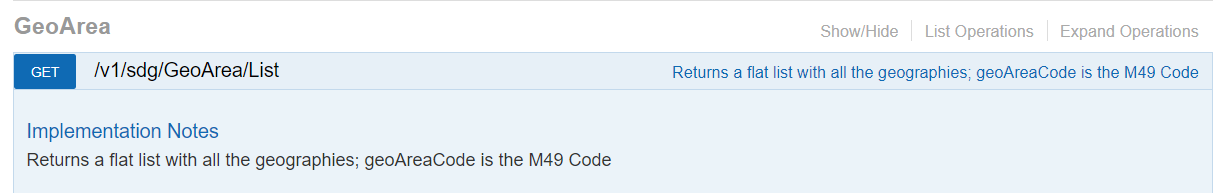



In [6]:
# Get a flat list with all the geographies
regionsList = requests.get("https://unstats.un.org/SDGAPI/v1/sdg/GeoArea/List")
regionsData = regionsList.json()
for region in regionsData:
    print(region['geoAreaCode'], region['geoAreaName'])

4 Afghanistan
248 Åland Islands
8 Albania
12 Algeria
16 American Samoa
20 Andorra
24 Angola
660 Anguilla
10 Antarctica
28 Antigua and Barbuda
32 Argentina
51 Armenia
533 Aruba
36 Australia
40 Austria
31 Azerbaijan
44 Bahamas
48 Bahrain
50 Bangladesh
52 Barbados
112 Belarus
56 Belgium
84 Belize
204 Benin
60 Bermuda
64 Bhutan
68 Bolivia (Plurinational State of)
70 Bosnia and Herzegovina
72 Botswana
74 Bouvet Island
76 Brazil
92 British Virgin Islands
86 British Indian Ocean Territory
96 Brunei Darussalam
100 Bulgaria
854 Burkina Faso
108 Burundi
116 Cambodia
120 Cameroon
124 Canada
132 Cabo Verde
136 Cayman Islands
140 Central African Republic
148 Chad
152 Chile
156 China
344 China, Hong Kong Special Administrative Region
446 China, Macao Special Administrative Region
162 Christmas Island
166 Cocos (Keeling) Islands
170 Colombia
174 Comoros
178 Congo
180 Democratic Republic of the Congo
184 Cook Islands
188 Costa Rica
384 Côte d'Ivoire
191 Croatia
192 Cuba
196 Cyprus
203 Czechia
208 Denm

**Store a List of Country geoAreaCodes**

We can see that some `geoAreaCodes` represents not only countries, but also regions. We want to select particular Asian countries, so we will find all the `geoAreaCodes` for the countries that we are interested in and store them in a list.

In [7]:
# Prepare list of required countries for comparison
# you can add or remove countries as you wish
countriesWanted = ['Australia','Bangladesh','Cambodia','China','India',
                   'Indonesia','Japan','Malaysia','Philippines','Singapore',
                   'Sri Lanka','Thailand','Viet Nam']
countryCodes = []
regionsListData = regionsList.json()
for region in regionsListData:
    if region['geoAreaName'] in countriesWanted:
        countryCodes.append(region['geoAreaCode'])
print(countryCodes)

['36', '50', '116', '156', '356', '360', '392', '458', '608', '702', '144', '764', '704']


**Getting Data**

Now that we have the list of countries that we want and the series codes for the required goal, we can form our parameters in a `payload` and send another request to get data for the series.

For example, to get the data for the series 'SI_POV_EMP1', the "Employed population below international poverty line, by sex and age (%)":

In [8]:
# Get the data for the defined series
# you can change the series code
payload ={'seriesCode':'SI_POV_EMP1', 'areaCode':countryCodes}
poverty = requests.get("https://unstats.un.org/SDGAPI/v1/sdg/Series/Data", params= payload)

# Decode and display the result
povertyDict = poverty.json()
povertyDict

{'size': 25,
 'totalElements': 2002,
 'totalPages': 81,
 'pageNumber': 1,
 'attributes': [{'id': 'Nature',
   'codes': [{'code': 'C', 'description': 'Country data', 'sdmx': 'C'},
    {'code': 'CA', 'description': 'Country adjusted data', 'sdmx': 'CA'},
    {'code': 'E', 'description': 'Estimated data', 'sdmx': 'E'},
    {'code': 'G', 'description': 'Global monitoring data', 'sdmx': 'G'},
    {'code': 'M', 'description': 'Modeled data', 'sdmx': 'M'},
    {'code': 'N', 'description': 'Non-relevant', 'sdmx': 'N'},
    {'code': 'NA', 'description': 'Data nature not available', 'sdmx': '_X'}]},
  {'id': 'Observation Status',
   'codes': [{'code': 'A', 'description': 'Normal value', 'sdmx': 'A'},
    {'code': 'U', 'description': 'Low reliability', 'sdmx': 'U'}]},
  {'id': 'Units',
   'codes': [{'code': 'PERCENT', 'description': 'Percentage', 'sdmx': 'PT'}]}],
 'dimensions': [{'id': 'Age',
   'codes': [{'code': '<1M', 'description': 'under 1 month old', 'sdmx': 'M0'},
    {'code': '<1Y', 'des

**Check Returned Data**

We can see that the dictionary keys are `size`, `totalElements`, `totalPages`, `pageNumber`, `attributes` and `data`. From the values of the `totalPages` and `pageNumber`, we can see that this is page number 1 out of 63 pages.

In [9]:
print('Page number :', povertyDict['pageNumber'])
print('Total Pages :', povertyDict['totalPages'])

Page number : 1
Total Pages : 81


**Show the Data**

Let's use a `for` loop to go through values with the `data` key.

In [10]:
# Extract the values from the 'data' key
countryData = povertyDict['data']
for item in countryData:
    print(item['geoAreaName'], item['series'], item['timePeriodStart'], item['value'], item['dimensions'])

Bangladesh SI_POV_EMP1 2000.0 28.5 {'Age': '25+', 'Sex': 'MALE', 'Reporting Type': 'G'}
Bangladesh SI_POV_EMP1 2000.0 29.9 {'Age': '15+', 'Sex': 'BOTHSEX', 'Reporting Type': 'G'}
Bangladesh SI_POV_EMP1 2000.0 30.3 {'Age': '15-24', 'Sex': 'BOTHSEX', 'Reporting Type': 'G'}
Bangladesh SI_POV_EMP1 2000.0 35.4 {'Age': '15-24', 'Sex': 'FEMALE', 'Reporting Type': 'G'}
Bangladesh SI_POV_EMP1 2000.0 28.7 {'Age': '15-24', 'Sex': 'MALE', 'Reporting Type': 'G'}
Bangladesh SI_POV_EMP1 2000.0 29.7 {'Age': '25+', 'Sex': 'BOTHSEX', 'Reporting Type': 'G'}
Bangladesh SI_POV_EMP1 2000.0 34.2 {'Age': '15+', 'Sex': 'FEMALE', 'Reporting Type': 'G'}
Bangladesh SI_POV_EMP1 2000.0 28.5 {'Age': '15+', 'Sex': 'MALE', 'Reporting Type': 'G'}
Bangladesh SI_POV_EMP1 2000.0 33.8 {'Age': '25+', 'Sex': 'FEMALE', 'Reporting Type': 'G'}
Bangladesh SI_POV_EMP1 2001.0 27.4 {'Age': '25+', 'Sex': 'MALE', 'Reporting Type': 'G'}
Bangladesh SI_POV_EMP1 2001.0 27.7 {'Age': '15-24', 'Sex': 'MALE', 'Reporting Type': 'G'}
Banglades

There is only one country shown, but as we noticed this was only page number 1 out of 63 pages. We could send requests again in a loop using the number of pages as the loop range. However, there might be a better API endpoint that we can use.

## Post Request API

A POST request is another type of API request. 

The difference between a GET request and a POST request is that GET request is usually to retrieve resources, while POST request is usually used to create or upload data resources. Furthermore, the keyword argument for request parameters is different:
- in POST request, we use keyword argument `data`
- in GET request, we use the keyword argument `params`.

Another API endpoint for retrieving the data series is `/v1/sdg/Series/DataCSV`, which returns a CSV file.

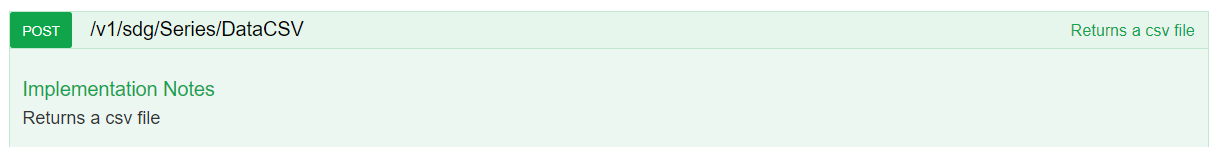

Let's send the POST request using the same payload.

In [11]:
# Use the same payload to get a CSV file using POST request  
payload = {'seriesCodes':'SI_POV_EMP1','areaCodes':countryCodes}

# Pass the parameters using the 'data='' keyword argument
seriesData = requests.post("https://unstats.un.org/SDGAPI/v1/sdg/Series/DataCSV", data=payload)
print(seriesData.status_code)
print(seriesData.headers)

200
{'Content-Length': '1048576', 'Content-Type': 'application/octet-stream', 'Accept-Ranges': 'bytes', 'Server': 'Kestrel', 'Content-Disposition': "attachment; filename=series.csv; filename*=UTF-8''series.csv", 'X-Powered-By': 'ASP.NET', 'X-Xss-Protection': '1; mode=block', 'Content-Security-Policy': "object-src 'none' ; img-src 'self' https://*.twimg.com/ https://*.un.org/ https://*.twitter.com/ data:; frame-src 'self' https://whova.com https://d1keuthy5s86c8.cloudfront.net https://unb2c.b2clogin.com/ https://*.arcgis.com https://www.youtube.com https://youtube.com https://*.twitter.com https://fonts.googleapis.com https://maxcdn.bootstrapcdn.com https://flickrembed.com/ https://public.tableau.com https://unb2c.b2clogin.com/unb2c.onmicrosoft.com https://login.microsoftonline.com/* https://aadcdn.msauth.net/* https://login.microsoftonline.com/ https://www.podbean.com/  https://*.un.org/", 'Referrer-Policy': 'no-referrer-when-downgrade', 'Strict-Transport-Security': 'max-age=31536000; 

**Saving the CSV file**

If we look at the content type in the response `headers`, you will see that the response type is `application/octet-stream`. It means that the response is in binary format, not the usual JSON format. 

Since we know it is a CSV file, we can save it using our file handling techniques from Week 2.

In [12]:
# Write the CSV content into a file
povertyFile = open('poverty.csv', 'wb')      # open a file for writing, in binary format
povertyFile.write(seriesData.content)        # write the content to the file
povertyFile.close()                          # close the file properly

**Exploring the Data with Pandas**

Now that the file has been saved to our directory, we can view it using Microsoft Excel or even a notepad. 
However, we can also use Pandas to explore the data by loading it back in as a `DataFrame` object.

In [13]:
import pandas as pd

povertyData = pd.read_csv('poverty.csv')
povertyData.head()

,Goal,Target,Indicator,SeriesCode,SeriesDescription,GeoAreaCode,GeoAreaName,TimePeriod,Value,Time_Detail,...,BasePeriod,Source,GeoInfoUrl,FootNote,[Age],[Nature],[Observation Status],[Reporting Type],[Sex],[Units]
0,1.0,1.1,1.1.1,SI_POV_EMP1,Employed population below international povert...,50.0,Bangladesh,2000.0,30.3,2000.0,...,NaN,"Source = ILO modelled estimates, November 2021...",NaN,NaN,15-24,M,A,G,BOTHSEX,PERCENT
1,1.0,1.1,1.1.1,SI_POV_EMP1,Employed population below international povert...,50.0,Bangladesh,2000.0,35.4,2000.0,...,NaN,"Source = ILO modelled estimates, November 2021...",NaN,NaN,15-24,M,A,G,FEMALE,PERCENT
2,1.0,1.1,1.1.1,SI_POV_EMP1,Employed population below international povert...,50.0,Bangladesh,2000.0,28.7,2000.0,...,NaN,"Source = ILO modelled estimates, November 2021...",NaN,NaN,15-24,M,A,G,MALE,PERCENT
3,1.0,1.1,1.1.1,SI_POV_EMP1,Employed population below international povert...,50.0,Bangladesh,2000.0,29.7,2000.0,...,NaN,"Source = ILO modelled estimates, November 2021...",NaN,NaN,25+,M,A,G,BOTHSEX,PERCENT
4,1.0,1.1,1.1.1,SI_POV_EMP1,Employed population below international povert...,50.0,Bangladesh,2000.0,28.5,2000.0,...,NaN,"Source = ILO modelled estimates, November 2021...",NaN,NaN,25+,M,A,G,MALE,PERCENT


In [14]:
# Check DataFrame info
povertyData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2003 entries, 0 to 2002
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Goal                  2002 non-null   float64
 1   Target                2002 non-null   float64
 2   Indicator             2002 non-null   object 
 3   SeriesCode            2002 non-null   object 
 4   SeriesDescription     2002 non-null   object 
 5   GeoAreaCode           2002 non-null   float64
 6   GeoAreaName           2002 non-null   object 
 7   TimePeriod            2002 non-null   float64
 8   Value                 2002 non-null   float64
 9   Time_Detail           2002 non-null   float64
 10  TimeCoverage          0 non-null      float64
 11  UpperBound            0 non-null      float64
 12  LowerBound            0 non-null      float64
 13  BasePeriod            0 non-null      float64
 14  Source                2002 non-null   object 
 15  GeoInfoUrl           

**Missing Value Treatment** 

Looks like we have to do some data cleaning on the missing/null values. From the `info()` method above, we can see that the `TimeCoverage`, `UpperBound`, `LowerBound`, `BasePeriod`, `GeoInfoUrl` and `FootNote` columns have null values. We can also count the number of null values for each column.

In [15]:
# Count number of missing values for each column
povertyData.isnull().sum()

Goal                       1
Target                     1
Indicator                  1
SeriesCode                 1
SeriesDescription          1
GeoAreaCode                1
GeoAreaName                1
TimePeriod                 1
Value                      1
Time_Detail                1
TimeCoverage            2003
UpperBound              2003
LowerBound              2003
BasePeriod              2003
Source                     1
GeoInfoUrl              2003
FootNote                2003
[Age]                      1
[Nature]                   1
[Observation Status]       1
[Reporting Type]           1
[Sex]                      1
[Units]                    1
dtype: int64

Out of 1567 entries, there are 1567 values for `TimeCoverage`, `UpperBound`, `LowerBound`, `BasePeriod`, `GeoInfoUrl` and `FootNote` columns. This means these values are all null.

There is also one null value for each of the other columns. Let's drop all rows that contain missing value and drop all columns that all of its value is missing.

In [16]:
# Drop Null values for axis=1, how='all' means drop the columns with ALL null values
povertyData.dropna(axis=1, how="all", inplace=True)

# Now drop all rows with ALL null values
povertyData.dropna(axis=0, how="all", inplace=True)

povertyData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2002 entries, 0 to 2001
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Goal                  2002 non-null   float64
 1   Target                2002 non-null   float64
 2   Indicator             2002 non-null   object 
 3   SeriesCode            2002 non-null   object 
 4   SeriesDescription     2002 non-null   object 
 5   GeoAreaCode           2002 non-null   float64
 6   GeoAreaName           2002 non-null   object 
 7   TimePeriod            2002 non-null   float64
 8   Value                 2002 non-null   float64
 9   Time_Detail           2002 non-null   float64
 10  Source                2002 non-null   object 
 11  [Age]                 2002 non-null   object 
 12  [Nature]              2002 non-null   object 
 13  [Observation Status]  2002 non-null   object 
 14  [Reporting Type]      2002 non-null   object 
 15  [Sex]                

**Converting Data Types**

Let's convert the `TimePeriod`column data type into integer rather than float.

In [17]:
# Convert the 'TimePeriod' column data type
povertyData['TimePeriod'] = povertyData['TimePeriod'].astype(int)

**Check Category Levels**

We also want to check the number of values for each of the categories of interest.

In [18]:
print(povertyData['GeoAreaName'].value_counts())
print(povertyData['TimePeriod'].value_counts())
print(povertyData['[Age]'].value_counts())
print(povertyData['[Sex]'].value_counts())

Bangladesh     182
Cambodia       182
Sri Lanka      182
China          182
India          182
Indonesia      182
Malaysia       182
Philippines    182
Singapore      182
Viet Nam       182
Thailand       182
Name: GeoAreaName, dtype: int64
2000    99
2001    99
2019    99
2018    99
2017    99
2016    99
2015    99
2014    99
2013    99
2012    99
2011    99
2010    99
2009    99
2008    99
2007    99
2006    99
2005    99
2004    99
2003    99
2002    99
2020    11
2021    11
Name: TimePeriod, dtype: int64
15+      682
15-24    660
25+      660
Name: [Age], dtype: int64
BOTHSEX    682
FEMALE     660
MALE       660
Name: [Sex], dtype: int64


**Renaming Columns**

We might want to rename some columns, so that it is clearer and easier for us to use. Let's rename:
- `GeoAreaName` as `Country`
- `TimePeriod` as `Year`
- Columns with square brackets `[]` around its name

In [19]:
# Rename the columns, inplace
povertyData.rename(columns={'GeoAreaName':'Country', 'TimePeriod':'Year', '[Age]':'Age', '[Sex]':'Sex'}, inplace=True)
povertyData.head()

,Goal,Target,Indicator,SeriesCode,SeriesDescription,GeoAreaCode,Country,Year,Value,Time_Detail,Source,Age,[Nature],[Observation Status],[Reporting Type],Sex,[Units]
0,1.0,1.1,1.1.1,SI_POV_EMP1,Employed population below international povert...,50.0,Bangladesh,2000,30.3,2000.0,"Source = ILO modelled estimates, November 2021...",15-24,M,A,G,BOTHSEX,PERCENT
1,1.0,1.1,1.1.1,SI_POV_EMP1,Employed population below international povert...,50.0,Bangladesh,2000,35.4,2000.0,"Source = ILO modelled estimates, November 2021...",15-24,M,A,G,FEMALE,PERCENT
2,1.0,1.1,1.1.1,SI_POV_EMP1,Employed population below international povert...,50.0,Bangladesh,2000,28.7,2000.0,"Source = ILO modelled estimates, November 2021...",15-24,M,A,G,MALE,PERCENT
3,1.0,1.1,1.1.1,SI_POV_EMP1,Employed population below international povert...,50.0,Bangladesh,2000,29.7,2000.0,"Source = ILO modelled estimates, November 2021...",25+,M,A,G,BOTHSEX,PERCENT
4,1.0,1.1,1.1.1,SI_POV_EMP1,Employed population below international povert...,50.0,Bangladesh,2000,28.5,2000.0,"Source = ILO modelled estimates, November 2021...",25+,M,A,G,MALE,PERCENT


**Separating the Data**

Looking at the data values, we can see that some of it would be redundant, such as:
- the `Age` of 15+ encompasses both 15 - 24 and 25+
- BOTHSEX encompasses both FEMALE and MALE.

So, we should decide which data we want to include for analysis.

Let's separate it into 2 data sets:
- one with the combined data for 15+ and BOTHSEX
- one with the breakdown by age and SEX.

We can do this with pandas by defining two separate data sets:
- combined data where the `[Age]` value is '15+' and `[Sex]` value is 'BOTHSEX'
- the detailed data where it does not fit the criteria for the combined data.

In [20]:
# Separate into two data sets
combinedData = povertyData[(povertyData['Age']=='15+') & (povertyData['Sex']=='BOTHSEX')]
detailedData = povertyData[(povertyData['Age']!='15+') & (povertyData['Sex']!='BOTHSEX')]

Let's check what the two data sets look like. We did not change all the column names, but you may rename it if you want.

In [21]:
combinedData.head()

,Goal,Target,Indicator,SeriesCode,SeriesDescription,GeoAreaCode,Country,Year,Value,Time_Detail,Source,Age,[Nature],[Observation Status],[Reporting Type],Sex,[Units]
5,1.0,1.1,1.1.1,SI_POV_EMP1,Employed population below international povert...,50.0,Bangladesh,2000,29.9,2000.0,"Source = ILO modelled estimates, November 2021...",15+,M,A,G,BOTHSEX,PERCENT
16,1.0,1.1,1.1.1,SI_POV_EMP1,Employed population below international povert...,50.0,Bangladesh,2001,28.8,2001.0,"Source = ILO modelled estimates, November 2021...",15+,M,A,G,BOTHSEX,PERCENT
23,1.0,1.1,1.1.1,SI_POV_EMP1,Employed population below international povert...,50.0,Bangladesh,2002,29.0,2002.0,"Source = ILO modelled estimates, November 2021...",15+,M,A,G,BOTHSEX,PERCENT
34,1.0,1.1,1.1.1,SI_POV_EMP1,Employed population below international povert...,50.0,Bangladesh,2003,27.5,2003.0,"Source = ILO modelled estimates, November 2021...",15+,M,A,G,BOTHSEX,PERCENT
40,1.0,1.1,1.1.1,SI_POV_EMP1,Employed population below international povert...,50.0,Bangladesh,2004,24.9,2004.0,"Source = ILO modelled estimates, November 2021...",15+,M,A,G,BOTHSEX,PERCENT


In [22]:
detailedData.head()

,Goal,Target,Indicator,SeriesCode,SeriesDescription,GeoAreaCode,Country,Year,Value,Time_Detail,Source,Age,[Nature],[Observation Status],[Reporting Type],Sex,[Units]
1,1.0,1.1,1.1.1,SI_POV_EMP1,Employed population below international povert...,50.0,Bangladesh,2000,35.4,2000.0,"Source = ILO modelled estimates, November 2021...",15-24,M,A,G,FEMALE,PERCENT
2,1.0,1.1,1.1.1,SI_POV_EMP1,Employed population below international povert...,50.0,Bangladesh,2000,28.7,2000.0,"Source = ILO modelled estimates, November 2021...",15-24,M,A,G,MALE,PERCENT
4,1.0,1.1,1.1.1,SI_POV_EMP1,Employed population below international povert...,50.0,Bangladesh,2000,28.5,2000.0,"Source = ILO modelled estimates, November 2021...",25+,M,A,G,MALE,PERCENT
8,1.0,1.1,1.1.1,SI_POV_EMP1,Employed population below international povert...,50.0,Bangladesh,2000,33.8,2000.0,"Source = ILO modelled estimates, November 2021...",25+,M,A,G,FEMALE,PERCENT
10,1.0,1.1,1.1.1,SI_POV_EMP1,Employed population below international povert...,50.0,Bangladesh,2001,34.2,2001.0,"Source = ILO modelled estimates, November 2021...",15-24,M,A,G,FEMALE,PERCENT


**Plotting**

Let's plot the data using Matplotlib library. We can use the `combinedData` to compare the data values over time for the different countries.

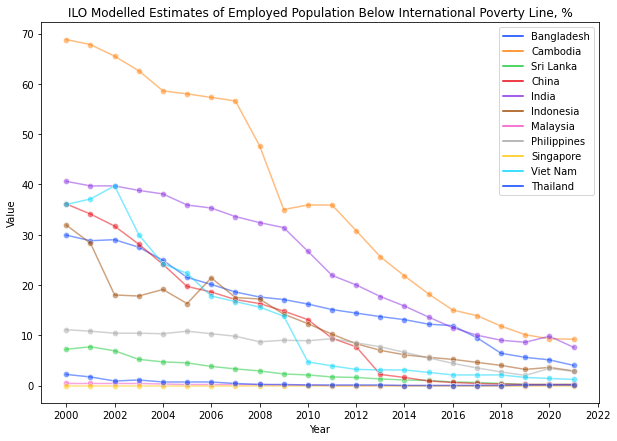

In [23]:
# Import plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the 'combinedData'
fig, ax = plt.subplots(figsize=(10,7))
ax = sns.lineplot(data=combinedData, x='Year', y='Value', hue='Country', marker='o', alpha=0.5, palette='bright')
plt.legend(bbox_to_anchor=(1, 1))
ax.xaxis.set_major_locator(plt.MultipleLocator(2))
ax.set_title("ILO Modelled Estimates of Employed Population Below International Poverty Line, %")
plt.show()

For the `detailedData`, we could create subplots or facets to compare them better.

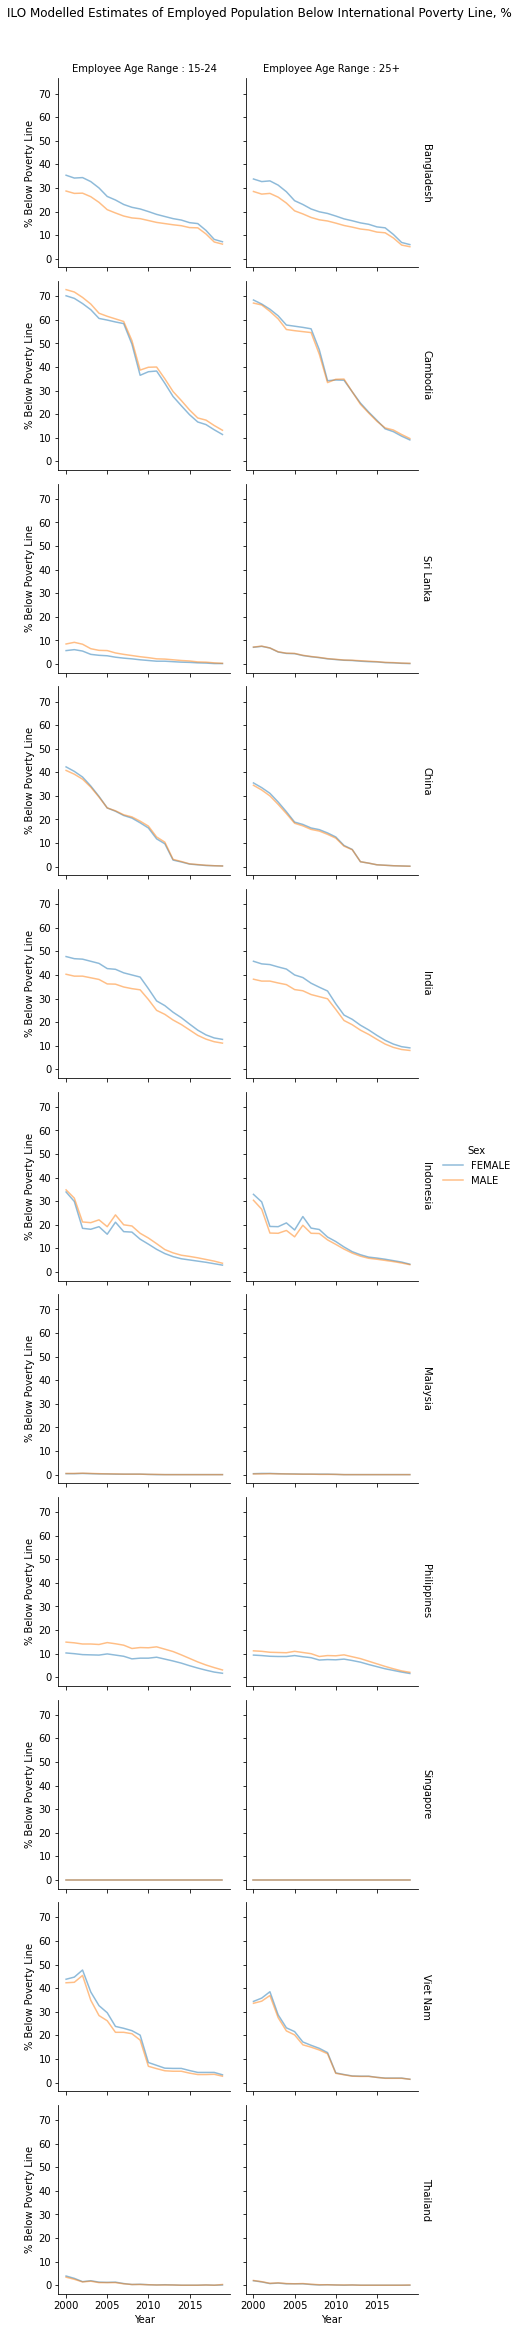

In [24]:
# Use FacetGrid to compare countries, Employee Age Range and Sex
g = sns.FacetGrid(data = detailedData, row='Country', col='Age', hue='Sex',  margin_titles=True)
g.map(sns.lineplot, 'Year', 'Value',alpha=0.5)
g.set_axis_labels("Year", "% Below Poverty Line")
g.set_titles(col_template="Employee Age Range : {col_name}", row_template="{row_name}")
g.add_legend()
g.fig.suptitle('ILO Modelled Estimates of Employed Population Below International Poverty Line, %')
g.fig.subplots_adjust(top=0.95)

You can try to plot other data or use a different indicator with the above code.

Always check the data that is returned from the API and consider how it has been arranged and what the values mean.

## Exercises

Let's try to get data for different goal. For example 'Goal 4: Ensure inclusive and equitable quality education and promote lifelong learning opportunities for all'.

**Q1 Get Series for Goal 4**

Using the `https://unstats.un.org/SDGAPI/v1/sdg/Indicator/List` API endpoint, show the series list for this Goal!

In [25]:
# Q1 Get the indicators for Goal 4
response = requests.get("https://unstats.un.org/SDGAPI/v1/sdg/Indicator/List")
indicatorlist = response.json()

# You can change the goal required
requiredGoal = '4'

# show indicators for this goal
for indicator in indicatorlist:
    if indicator['goal']==requiredGoal:
        print('\n',indicator['code'], indicator['description'])
    
        # Show data series for this indicator
        indicatorSeries = indicator['series']
        for series in indicatorSeries:
            print(series['code'], series['description'])


 4.1.1 Proportion of children and young people (a) in grades 2/3; (b) at the end of primary; and (c) at the end of lower secondary achieving at least a minimum proficiency level in (i) reading and (ii) mathematics, by sex
SE_TOT_PRFL Proportion of children and young people achieving a minimum proficiency level in reading and mathematics (%)

 4.1.2 Completion rate (primary education, lower secondary education, upper secondary education)
SE_TOT_CPLR Completion rate, by sex, location, wealth quintile and education level (%)

 4.2.1 Proportion of children aged 24-59 months who are developmentally on track in health, learning and psychosocial well-being, by sex
SE_DEV_ONTRK Proportion of children aged 36−59 months who are developmentally on track in at least three of the following domains: literacy-numeracy, physical development, social-emotional development, and learning (% of children aged 36-59 months)

 4.2.2 Participation rate in organized learning (one year before the official prima

**Q2 Get CSV File**

Let's use the 'Indicator 4.4.1 Proportion of youth and adults with information and communications technology (ICT) skills', by `[Type of skill]`.
- What is the series code?
- Use the same country codes as before!

Send a POST request to retrieve the CSV data.

In [26]:
# Q2 Get a CSV file  with POST request  
payload = {'seriesCodes':'SE_ADT_ACTS', 'areaCodes':countryCodes}

# Call the API with a post request and pass the parameters using the data= keyword args
seriesData = requests.post("https://unstats.un.org/SDGAPI/v1/sdg/Series/DataCSV", data=payload)
print(seriesData.status_code)
print(seriesData.headers)

200
{'Content-Length': '262144', 'Content-Type': 'application/octet-stream', 'Accept-Ranges': 'bytes', 'Server': 'Kestrel', 'Content-Disposition': "attachment; filename=series.csv; filename*=UTF-8''series.csv", 'X-Powered-By': 'ASP.NET', 'X-Xss-Protection': '1; mode=block', 'Content-Security-Policy': "object-src 'none' ; img-src 'self' https://*.twimg.com/ https://*.un.org/ https://*.twitter.com/ data:; frame-src 'self' https://whova.com https://d1keuthy5s86c8.cloudfront.net https://unb2c.b2clogin.com/ https://*.arcgis.com https://www.youtube.com https://youtube.com https://*.twitter.com https://fonts.googleapis.com https://maxcdn.bootstrapcdn.com https://flickrembed.com/ https://public.tableau.com https://unb2c.b2clogin.com/unb2c.onmicrosoft.com https://login.microsoftonline.com/* https://aadcdn.msauth.net/* https://login.microsoftonline.com/ https://www.podbean.com/  https://*.un.org/", 'Referrer-Policy': 'no-referrer-when-downgrade', 'Strict-Transport-Security': 'max-age=31536000; i

**Q3 Save the CSV Data**

Save the data into a file titled 'ictSkills.csv'!

In [27]:
# Q3 Write the CSV content into a file
skillsFile = open('ictSkills.csv', 'wb')    # open a file for writing, in binary format
skillsFile.write(seriesData.content)        # write the content to the file
skillsFile.close()                          # close the file properly

**Q4 Read from a File using Pandas**

Load the CSV file into a DataFrame called `ictSkillsData` and view it!

In [28]:
#Q4 Load the file into a variable called 'ictSkillsData'
ictSkillsData = pd.read_csv('ictSkills.csv')
ictSkillsData.head()

,Goal,Target,Indicator,SeriesCode,SeriesDescription,GeoAreaCode,GeoAreaName,TimePeriod,Value,Time_Detail,...,Source,GeoInfoUrl,FootNote,[Age],[Location],[Nature],[Reporting Type],[Sex],[Type of skill],[Units]
0,4.0,4.4,4.4.1,SE_ADT_ACTS,Proportion of youth and adults with informatio...,392.0,Japan,2017.0,0.60350,2017.0,...,Ministry of Internal Affairs and Communications,NaN,NaN,NaN,NaN,C,G,BOTHSEX,PCPR,PERCENT
1,4.0,4.4,4.4.1,SE_ADT_ACTS,Proportion of youth and adults with informatio...,392.0,Japan,2017.0,0.26785,2017.0,...,Ministry of Internal Affairs and Communications,NaN,NaN,NaN,NaN,C,G,FEMALE,PCPR,PERCENT
2,4.0,4.4,4.4.1,SE_ADT_ACTS,Proportion of youth and adults with informatio...,392.0,Japan,2017.0,0.96599,2017.0,...,Ministry of Internal Affairs and Communications,NaN,NaN,NaN,NaN,C,G,MALE,PCPR,PERCENT
3,4.0,4.4,4.4.1,SE_ADT_ACTS,Proportion of youth and adults with informatio...,392.0,Japan,2018.0,3.78603,2018.0,...,Ministry of Internal Affairs and Communications,NaN,NaN,NaN,NaN,C,G,BOTHSEX,PCPR,PERCENT
4,4.0,4.4,4.4.1,SE_ADT_ACTS,Proportion of youth and adults with informatio...,392.0,Japan,2018.0,44.14307,2018.0,...,Ministry of Internal Affairs and Communications,NaN,NaN,NaN,NaN,C,G,MALE,TRAF,PERCENT


**Q5 Drop Missing Values**

Drop the missing values for the rows and columns which contain ALL `null` values!

In [29]:
# Q5 Drop Null values for axis=1, how='all' means drop the columns with ALL null values
ictSkillsData.dropna(axis=1, how="all", inplace=True)

# Now drop all rows with ALL null values
ictSkillsData.dropna(axis=0, how="all", inplace=True)

ictSkillsData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 442 entries, 0 to 441
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Goal               442 non-null    float64
 1   Target             442 non-null    float64
 2   Indicator          442 non-null    object 
 3   SeriesCode         442 non-null    object 
 4   SeriesDescription  442 non-null    object 
 5   GeoAreaCode        442 non-null    float64
 6   GeoAreaName        442 non-null    object 
 7   TimePeriod         442 non-null    float64
 8   Value              442 non-null    float64
 9   Time_Detail        442 non-null    float64
 10  Source             442 non-null    object 
 11  [Nature]           442 non-null    object 
 12  [Reporting Type]   442 non-null    object 
 13  [Sex]              442 non-null    object 
 14  [Type of skill]    442 non-null    object 
 15  [Units]            442 non-null    object 
dtypes: float64(6), object(10)


**Q6 Get Value Counts**

Check the value counts for the `TimePeriod`, `[Sex]`, `[Type of skill]` and `GeoAreaNames` columns.

In [30]:
#Q6 Get value vounts
print(ictSkillsData['TimePeriod'].value_counts())
print(ictSkillsData['[Sex]'].value_counts())
print(ictSkillsData['[Type of skill]'].value_counts())
print(ictSkillsData['GeoAreaName'].value_counts())

2018.0    96
2019.0    95
2017.0    93
2020.0    77
2014.0    32
2015.0    26
2016.0    18
2013.0     5
Name: TimePeriod, dtype: int64
BOTHSEX    224
FEMALE     109
MALE       109
Name: [Sex], dtype: int64
TRAF     53
EPRS     53
EMAIL    53
SOFT     53
COPA     53
ARSP     51
INST     50
PCPR     47
CMFL     29
Name: [Type of skill], dtype: int64
Malaysia       112
Singapore       98
Thailand        86
Japan           69
Cambodia        36
Indonesia       26
Viet Nam         8
Philippines      7
Name: GeoAreaName, dtype: int64


**Q7 Filter the Data**

Create a subset that includes data only for the last 3 years with `[Sex]`value is 'MALE' or 'FEMALE'!

In [31]:
# Q7 select only data where sex is NOT 'BOTHSEX' and the TimePeriod is 2017 or later
ictSkills = ictSkillsData[(ictSkillsData['[Sex]']!='BOTHSEX') & (ictSkillsData['TimePeriod']>=2017)]
ictSkills

,Goal,Target,Indicator,SeriesCode,SeriesDescription,GeoAreaCode,GeoAreaName,TimePeriod,Value,Time_Detail,Source,[Nature],[Reporting Type],[Sex],[Type of skill],[Units]
1,4.0,4.4,4.4.1,SE_ADT_ACTS,Proportion of youth and adults with informatio...,392.0,Japan,2017.0,0.26785,2017.0,Ministry of Internal Affairs and Communications,C,G,FEMALE,PCPR,PERCENT
2,4.0,4.4,4.4.1,SE_ADT_ACTS,Proportion of youth and adults with informatio...,392.0,Japan,2017.0,0.96599,2017.0,Ministry of Internal Affairs and Communications,C,G,MALE,PCPR,PERCENT
4,4.0,4.4,4.4.1,SE_ADT_ACTS,Proportion of youth and adults with informatio...,392.0,Japan,2018.0,44.14307,2018.0,Ministry of Internal Affairs and Communications,C,G,MALE,TRAF,PERCENT
5,4.0,4.4,4.4.1,SE_ADT_ACTS,Proportion of youth and adults with informatio...,392.0,Japan,2018.0,39.84241,2018.0,Ministry of Internal Affairs and Communications,C,G,FEMALE,INST,PERCENT
6,4.0,4.4,4.4.1,SE_ADT_ACTS,Proportion of youth and adults with informatio...,392.0,Japan,2018.0,40.12201,2018.0,Ministry of Internal Affairs and Communications,C,G,FEMALE,ARSP,PERCENT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,4.0,4.4,4.4.1,SE_ADT_ACTS,Proportion of youth and adults with informatio...,764.0,Thailand,2020.0,16.13213,2020.0,National Statistical Office of Thailand,C,G,FEMALE,ARSP,PERCENT
427,4.0,4.4,4.4.1,SE_ADT_ACTS,Proportion of youth and adults with informatio...,764.0,Thailand,2020.0,18.50893,2020.0,National Statistical Office of Thailand,C,G,FEMALE,EMAIL,PERCENT
428,4.0,4.4,4.4.1,SE_ADT_ACTS,Proportion of youth and adults with informatio...,764.0,Thailand,2020.0,0.87177,2020.0,National Statistical Office of Thailand,C,G,FEMALE,PCPR,PERCENT
432,4.0,4.4,4.4.1,SE_ADT_ACTS,Proportion of youth and adults with informatio...,458.0,Malaysia,2020.0,42.87751,2020.0,"Department of Statistics, Malaysia",C,G,FEMALE,SOFT,PERCENT


**Q8 Plot the Data**

Create a barplot to compare the proportion of youths in `ictSkills` by country, `[Type of skill]` and `[Sex]`. 

Example: Using a facetgrid with showing barplots of value by `Sex`
- column = `GeoAreaName`
- row = `Type of Skill`
- hue = `Sex`

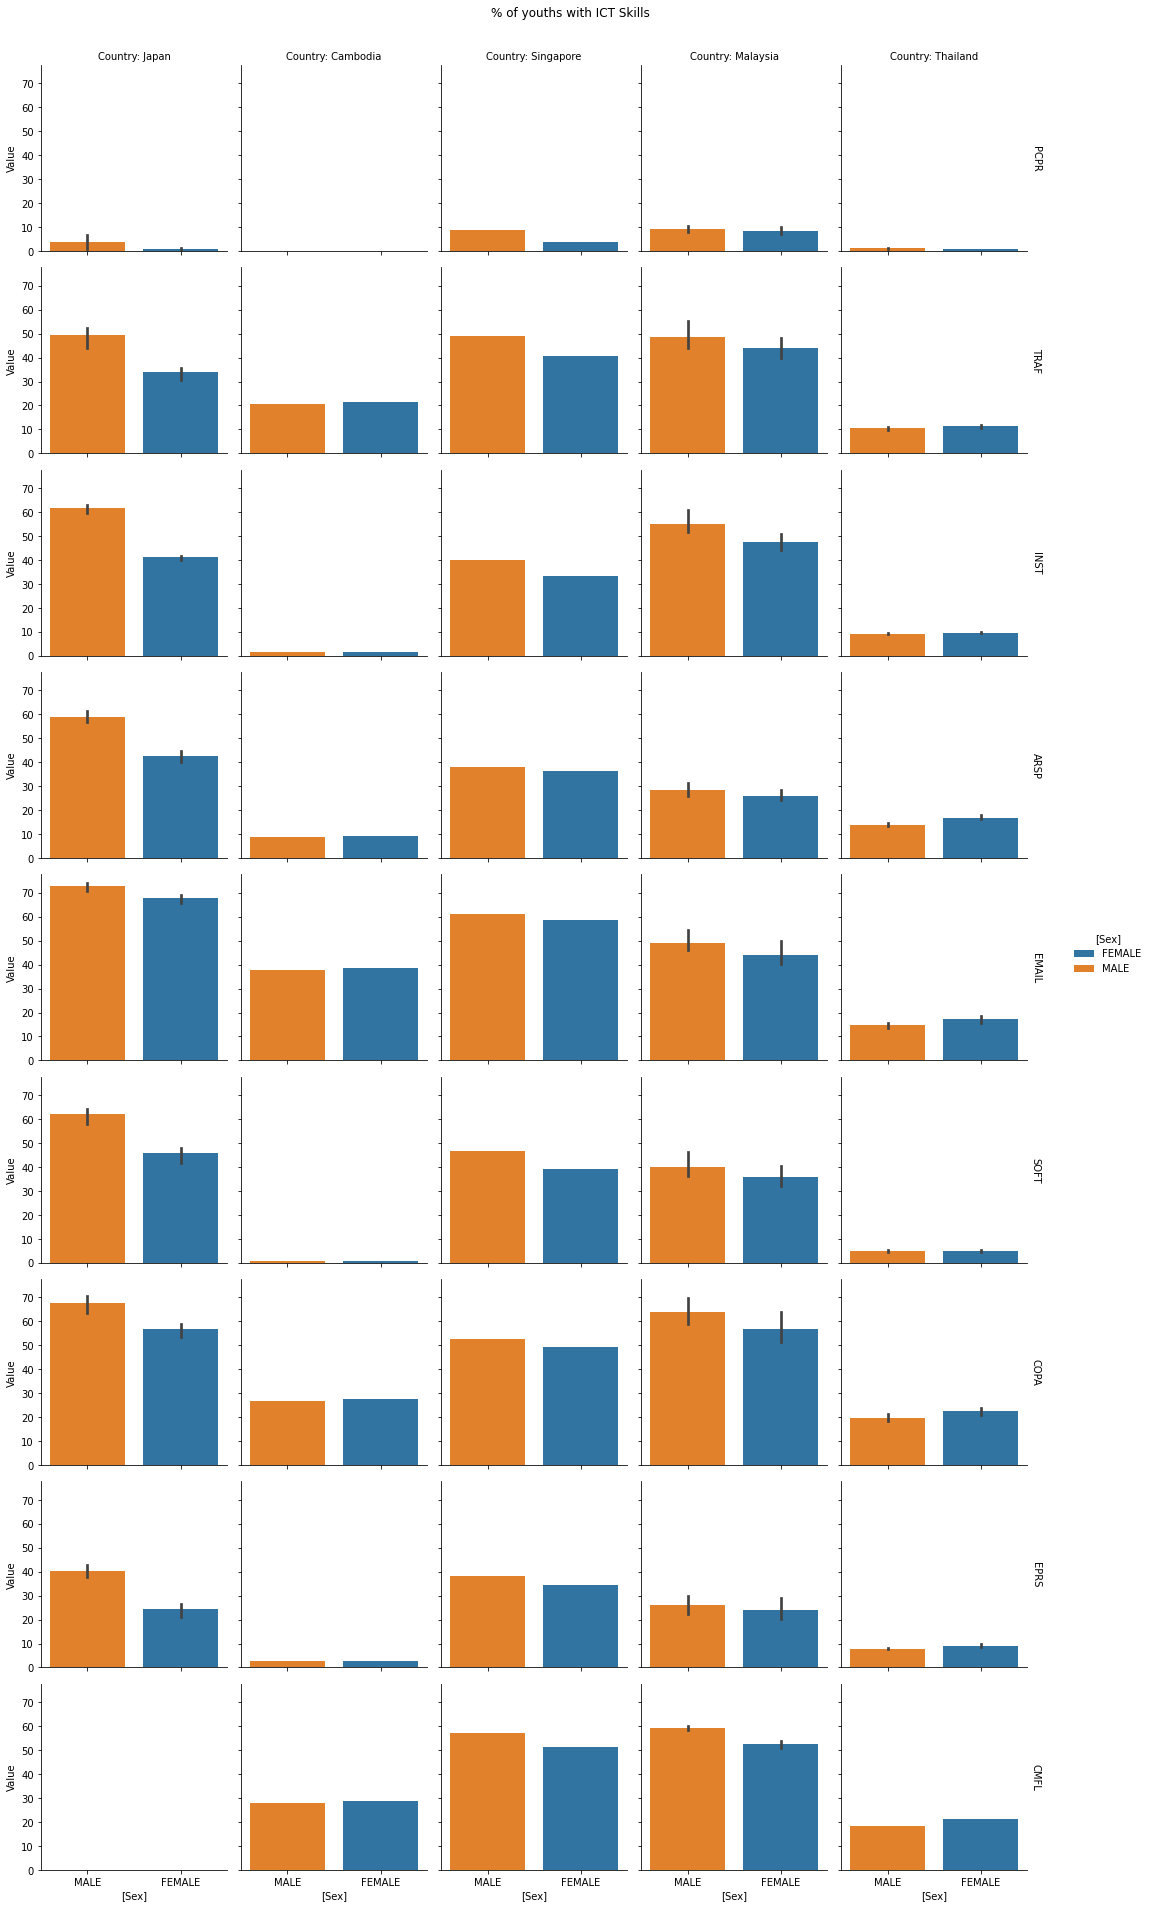

In [39]:
# Q8 Use FacetGrid to compare countries, Employee Age Range and Sex
g = sns.FacetGrid(data = ictSkills, col='GeoAreaName', row='[Type of skill]', hue='[Sex]', margin_titles=True)
g.map(sns.barplot, '[Sex]', 'Value', order=['MALE', 'FEMALE'])
g.set_titles(col_template="Country: {col_name}", row_template="{row_name}")
g.add_legend()
g.fig.suptitle('% of youths with ICT Skills')
g.fig.subplots_adjust(top=0.95)

**Note: Identifying 'Type of skill'**

The description of the `[Type of skill]` can be found in the series dimension. 

You can use the `https://unstats.un.org/SDGAPI/v1/sdg/Series/Data` API endpoint with the series code and any country code as the parameters to view the series dimension.

In [36]:
# Get the data for the defined series
# you can change the series code
payload ={'seriesCode':'SE_ADT_ACTS', 'areaCode':'458'}
response = requests.get("https://unstats.un.org/SDGAPI/v1/sdg/Series/Data", params= payload)
seriesInfo = response.json()


In [37]:
for dim in seriesInfo['dimensions']:
    if (dim['id']=='Type of skill'):
        skillcodes = dim['codes']

In [38]:
# Now you can use these as a reference in to the plot.
for skill in skillcodes:
    print(skill['code'], skill['description'])

ARSP Using basic arithmetic formula in a spreadsheet
COPA Using copy and paste tools to duplicate or move information within a document
EMAIL Sending e-mails with attached files
EPRS Creating electronic presentations with presentation software
INST Connecting and installing new devices
PCPR Writing a computer program using a specialized programming language
SOFT Finding, downloading, installing and configuring software
TRAF Transferring files between a computer and other devices
CMFL Copying or moving a file or folder
_T No breakdown
